## Análisis diferencial del campo fluido

### Divergencia de la velocidad

Vamos a comenzar con un ejemplo. Supongamos que tenemos un pistón que desliza longitudinalmente por un conducto recto en el que hay un gas. Al desplazar el pistón de izquierda a derecha rápidamente, se genera un campo de velocidad que involucra velocidades mayores en la zona cercana al pistón y menores en la zona más alejada. Entre ambas zonas existirá un **gradiente longitudinal de velocidad**. 

En la animación se muestra el movimiento del pistón, el campo de velocidades y la evolución de un volumen fluido (en verde). El mapa de colores indica la magnitud de la velocidad (azul, más velocidad; blanco, menos velocidad). La longitud de los vectores también nos indica la magnitud de la velocidad. Además, vemos que la velocidad está orientada en el eje $x$. 

Dicho volumen fluido se desplaza y se deforma debido a las características particulares de este flujo. En concreto, se observa que **se comprime**, debido al gradiente longitudinal de velocidad existente. Esto está relacionado con una **divergencia negativa** del campo de velocidades como veremos a continuación.



In [22]:
import math
import numpy as np              # Librería para poder trabajar con matrices y vectores
import matplotlib.pyplot as plt # Librería para poder dibujar gráficas
from myst_nb import glue
from scipy.interpolate import Rbf
from matplotlib import animation
from IPython.display import HTML

nq=2        #separacion entre vectores en quiver plot
Nx=40
Ny=8
Lx=8.0
Ly=2.0
xp = np.linspace(0, Lx, Nx)
yp = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(xp, yp)

def velU(x,t):
    return (1.0-1.0/(1.0+np.exp(-3*(x-(3.0+1.5*t)))))+0.5

t=0.0
U = velU(X,t)
V = np.zeros(np.shape(X))

ypos=1.0
XP=[0,ypos]

fig, (ax) = plt.subplots(figsize=(10, 3))

nframes=120    #frames de la animacion
tf=3        #tiempo total
dt=tf/nframes #paso de tiempo

xp1=4.0
xp2=5.0

def update_plot(num):
    global xp1,xp2
    t = dt*num
    xnew = velU(-100,0)*t
    
    ax.clear()

    U = velU(X,t)
    ax.contourf(X,Y,U,256,cmap="Blues")
    Q = ax.quiver(X[1:Ny-1,4:Nx-1:nq], Y[1:Ny-1,4:Nx-1:nq], U[1:Ny-1,4:Nx-1:nq], V[1:Ny-1,4:Nx-1:nq],alpha=0.4,scale=30,width=0.004)

    pt1, = ax.plot([], [], '.',color="tab:orange", ms=20,markeredgecolor="k")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_ylim([-0.15*Ly, 1.15*Ly])
    ax.set_xlim([0, Lx])
    ax.plot([0,Lx],[0, 0], 'k-',linewidth=1.5)
    ax.plot([0,Lx],[Ly, Ly], 'k-',linewidth=1.5)
    rect1 = plt.Rectangle((0, 0), Lx/12+0.205*Lx/4+xnew, Ly, color='white')
    ax.add_patch(rect1)
    rect2 = plt.Rectangle((Lx/12+xnew, 0.03*Ly), 0.2*Lx/4, 0.95*Ly, color='gray')
    ax.add_patch(rect2)
    rect3 = plt.Rectangle((0, 1-0.1*Ly), Lx/12+xnew, 0.2*Ly, color='gray')
    ax.add_patch(rect3)
    interpx = Rbf(X, Y, U)
    xp1 = xp1 + interpx(xp1,1.0)*dt
    xp2 = xp2 + interpx(xp2,1.0)*dt
    rect4 = plt.Rectangle((xp1, 1-0.2*Ly), xp2-xp1, 0.4*Ly, color='tab:green',alpha=0.6)
    ax.add_patch(rect4)
    ax.set_title("Campo de velocidades")

    return

plt.close()

anim_div = animation.FuncAnimation(fig, update_plot, frames=nframes, interval=60, blit=False) 

`````{margin} 
````{admonition} Para saber mas...
:class: note
El pistón comprimiendo el aire a gran velocidad puede formar **ondas de choque**, que involucran fuertes gradientes en las variables fluidas (velocidad, densidad, presión, etc). Las ondas de choque son habituales en **flujos compresibles**.
```{figure} https://upload.wikimedia.org/wikipedia/commons/7/7b/Schlierenfoto_Mach_1-2_Pfeilfl%C3%BCgel_-_NASA.jpg
---
width: 180px
name: sch1-img
---
Ondas de choque alrededor de un avión supersónico.
```
````

In [23]:
HTML(anim_div.to_html5_video()) 

Vamos a analizar lo que ocurre en un instante de tiempo concreto, para el cual el campo de velocidades viene dado por la siguiente expresión:

$$ u=  1.5-\frac{1}{1+\exp{(-3(x-3))}},\quad v=w=0  $$

En la siguiente figura se muestra el sistema conducto-pistón y se representa este campo de velocidad para este instante de tiempo.

0.6824

1.3176

-0.6351

0.5

0.5006

-0.0005

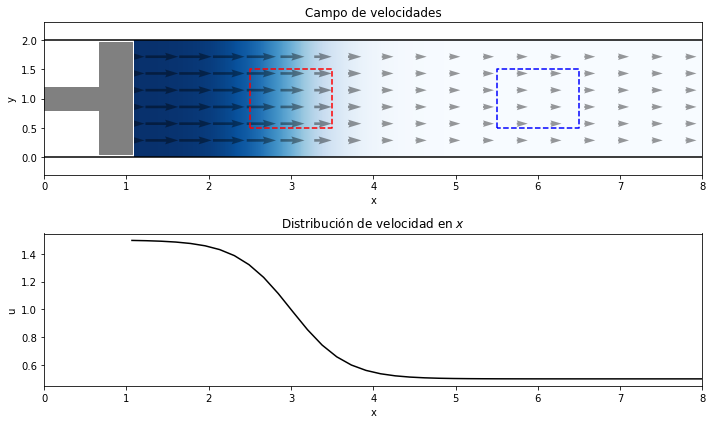

In [24]:
nq=2        #separacion entre vectores en quiver plot
Nx=40
Ny=8
Lx=8.0
Ly=2.0
xp = np.linspace(0, Lx, Nx)
yp = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(xp, yp)

def velU(x):
    return (1.0-1.0/(1.0+np.exp(-3*(x-3.0))))+0.5

def dUdx(x):
    return -(3* np.exp(-3 *(-3 + x)))/(1 + np.exp(-3*(-3 + x)))**2

t=0.0
U = velU(X)
V = np.zeros(np.shape(X))

ypos=1.0
XP=[0,ypos]

fig, (ax,ax2) = plt.subplots(2,1,figsize=(10, 6))
ax.contourf(X,Y,velU(X),256,cmap="Blues")
Q = ax.quiver(X[1:Ny-1,4:Nx-1:nq], Y[1:Ny-1,4:Nx-1:nq], U[1:Ny-1,4:Nx-1:nq], V[1:Ny-1,4:Nx-1:nq],alpha=0.4,scale=30,width=0.004)

pt1, = ax.plot([], [], '.',color="tab:orange", ms=20,markeredgecolor="k")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_ylim([-0.15*Ly, 1.15*Ly])
ax.set_xlim([0, Lx])
ax.plot([0,Lx],[0, 0], 'k-',linewidth=1.5)
ax.plot([0,Lx],[Ly, Ly], 'k-',linewidth=1.5)
rect1 = plt.Rectangle((0, 0), Lx/12+0.205*Lx/4, Ly, color='white')
ax.add_patch(rect1)
rect2 = plt.Rectangle((Lx/12, 0.03*Ly), 0.2*Lx/4, 0.95*Ly, color='gray')
ax.add_patch(rect2)
rect3 = plt.Rectangle((0, 1-0.1*Ly), Lx/12, 0.2*Ly, color='gray')
ax.add_patch(rect3)
ax.set_title("Campo de velocidades")

xp = np.linspace(Lx/12+0.2*Lx/4, Lx, Nx)
T1D=velU(xp)
ax2.plot(xp, T1D, 'k')
ax2.set_xlabel("x")
ax2.set_ylabel("u")
ax2.set_xlim([0, Lx])
ax2.set_title("Distribución de velocidad en $x$")

xc=3.0
yc=1.0
delta=0.5
ax.plot([xc-delta,xc-delta,xc+delta,xc+delta,xc-delta],[yc-delta,yc+delta,yc+delta,yc-delta,yc-delta], 'r--',linewidth=1.5)
vr=velU(xc+delta)
vl=velU(xc-delta)
div=(vr-vl)/(2*delta)
qr=vr*2*delta
ql=vl*2*delta

glue("var_qr1", np.round_(qr,4))
glue("var_ql1", np.round_(ql,4))
glue("var_div1", np.round_(div,4))

xc=6.0
yc=1.0
delta=0.5
ax.plot([xc-delta,xc-delta,xc+delta,xc+delta,xc-delta],[yc-delta,yc+delta,yc+delta,yc-delta,yc-delta], 'b--',linewidth=1.5)
vr=velU(xc+delta)
vl=velU(xc-delta)
div=(vr-vl)/(2*delta)
qr=vr*2*delta
ql=vl*2*delta

glue("var_qr2", np.round_(qr,4))
glue("var_ql2", np.round_(ql,4))
glue("var_div2", np.round_(div,4))

plt.tight_layout()
glue("div_fig", fig, display=False)

```{glue:} div_fig
```

Para introducir el concepto de divergencia, hemos definido dos volúmenes de control fijos e iguales, uno de ellos centrado en $x=3$ m (en rojo) y otro en $x=6$ m (en azul). Si calculamos el flujo volumétrico neto en cada uno de estos volúmenes obtenemos lo siquiente:

- En el volumen rojo: el flujo de entrada es {glue:text}`var_ql1` m$^3$/s,  el flujo de salida es {glue:text}`var_qr1` m$^3$/s y el flujo neto por unidad de volumen es {glue:text}`var_div1` m$^3$/s. Se observa que está entrando más flujo del que está saliendo, y por tanto el flujo neto es distinto de cero, es decir, hay una acumulación. Esto se debe a que el pistón genera un gradiente espacial (variación longitudinal) de velocidad en la zona en la que se sitúa este volumen.

- En el volumen azul: el flujo de entrada es {glue:text}`var_ql2` m$^3$/s,  el flujo de salida es {glue:text}`var_qr2` m$^3$/s y el flujo neto por unidad de volumen es {glue:text}`var_div2` m$^3$/s. Se observa que el flujo de entrada y de salida son prácticamente iguales, por lo tanto no hay acumulación. Esto se debe a que en esta zona, no existe gradiente de velocidad.

Con estos resultados, vemos que existe una relación entre la acumulación de flujo en un volumen de control y el gradiente espacial de velocidad. Esto nos permite introducir el concepto de **divergencia de la velocidad**.

```{admonition} Divergencia de la velocidad
:class: tip
La divergencia de la velocidad se define como el flujo neto por unidad de volumen que atraviesa la superficie de un volumen de control $V$ cuando éste tiende a cero:

$$
div(\vec{\bf{v}}):= \nabla \cdot \vec{\bf{v}} = \lim_{V\rightarrow 0} \frac{1}{V} \int_{\partial V}  \vec{\bf{v}} \cdot \hat{\bf{n}} dS
$$

y se calcula como

$$
\nabla \cdot \vec{\bf{v}} = \frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} + \frac{\partial w}{\partial z}
$$

```

Volviendo al ejemplo anterior, podemos calcular la divergencia de la velocidad utilizando esta expresión. Dado que la velocidad sólo tiene componente en $x$, la divergencia de la velocidad será:

$$
\nabla \cdot \vec{\bf{v}} = \frac{\partial u}{\partial x} =   3\frac{\exp{(-3(x-3))}}{(1+\exp{(-3(x-3))})^2} 
$$

que depende de $x$.

A continuación se representa el sistema conducto-pistón, junto con la distribución espacial de velocidad y su divergencia (en naranja). Nótese que la curva naranja es la representación gráfica de la expresión analítica de la divergencia de la velocidad, obtenida anteriormente. Se observa que la divergencia de la velocidad es siempre negativa, ya que la velocidad decrece monótonamente con $x$. Además, se observa que la divergencia de la velocidad es máxima (en magnitud) en $x=3$ m. Lejos de ese punto, la divergencia de la velocidad es cercana a cero.

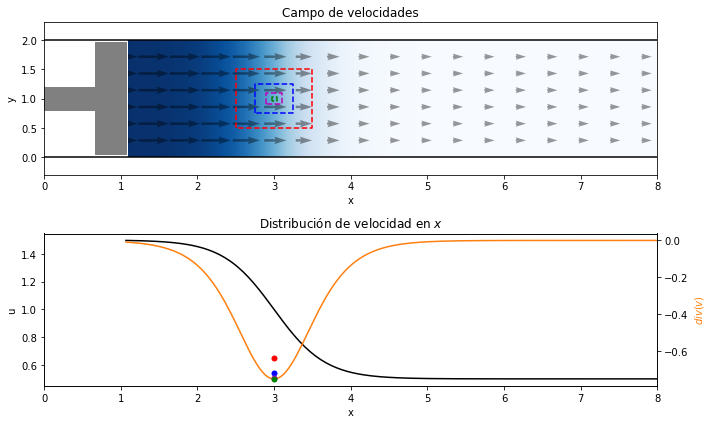

In [25]:
nq=2        #separacion entre vectores en quiver plot
Nx=40
Ny=8
Lx=8.0
Ly=2.0
xp = np.linspace(0, Lx, Nx)
yp = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(xp, yp)

def velU(x):
    return (1.0-1.0/(1.0+np.exp(-3*(x-3.0))))+0.5

def dUdx(x):
    return -(3* np.exp(-3 *(-3 + x)))/(1 + np.exp(-3*(-3 + x)))**2

t=0.0
U = velU(X)
V = np.zeros(np.shape(X))

ypos=1.0
XP=[0,ypos]

fig, (ax,ax2) = plt.subplots(2,1,figsize=(10, 6))
ax.contourf(X,Y,velU(X),256,cmap="Blues")
Q = ax.quiver(X[1:Ny-1,4:Nx-1:nq], Y[1:Ny-1,4:Nx-1:nq], U[1:Ny-1,4:Nx-1:nq], V[1:Ny-1,4:Nx-1:nq],alpha=0.4,scale=30,width=0.004)

pt1, = ax.plot([], [], '.',color="tab:orange", ms=20,markeredgecolor="k")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_ylim([-0.15*Ly, 1.15*Ly])
ax.set_xlim([0, Lx])
ax.plot([0,Lx],[0, 0], 'k-',linewidth=1.5)
ax.plot([0,Lx],[Ly, Ly], 'k-',linewidth=1.5)
rect1 = plt.Rectangle((0, 0), Lx/12+0.205*Lx/4, Ly, color='white')
ax.add_patch(rect1)
rect2 = plt.Rectangle((Lx/12, 0.03*Ly), 0.2*Lx/4, 0.95*Ly, color='gray')
ax.add_patch(rect2)
rect3 = plt.Rectangle((0, 1-0.1*Ly), Lx/12, 0.2*Ly, color='gray')
ax.add_patch(rect3)
ax.set_title("Campo de velocidades")

xp = np.linspace(Lx/12+0.2*Lx/4, Lx, 200)
T1D=velU(xp)
ax2.plot(xp, T1D, 'k')
ax2.set_xlabel("x")
ax2.set_ylabel("u")
ax2.set_xlim([0, Lx])
ax2.set_title("Distribución de velocidad en $x$")

axR = ax2.twinx()
deriv=dUdx(xp)
axR.plot(xp, deriv, color='tab:orange')
axR.set_ylabel("$div(v)$",color='tab:orange')

xc=3.0
yc=1.0

colors=["r","b","m","g","y"]
sizes=[1,2,5,15]

for i in range(0,4):
    delta=0.5/sizes[i]
    ax.plot([xc-delta,xc-delta,xc+delta,xc+delta,xc-delta],[yc-delta,yc+delta,yc+delta,yc-delta,yc-delta], '--',color=colors[i],linewidth=1.5)
    vr=velU(xc+delta)
    vl=velU(xc-delta)
    div=(vr-vl)/(2*delta)
    axR.plot(xc, div, '.',color=colors[i],ms=10)

plt.tight_layout()
glue("aprox_fig", fig, display=False)


```{glue:} aprox_fig
```

Hemos visto que la divergencia de la velocidad se define como el límite del flujo neto por unidad de volumen que atraviesa la superficie de un volumen de control $V$ cuando éste tiende a cero. Para mostrar gráficamente el concepto de divergencia de la velocidad, hemos aproximado su valor en $x=3$ m utilizando los distintos volúmenes representados en la figura mediante el siguiente cálculo

$$
div(\vec{\bf{v}}) \approx \frac{1}{V} \int_{\partial V}  \vec{\bf{v}} \cdot \hat{\bf{n}} dS
$$

y su valor numérico se ha representado con el color correspondiente en la gráfica. Se observa que **conforme se disminuye el tamaño del volumen, el valor numérico se aproxima más al valor exacto** proporcionado en la curva naranja.


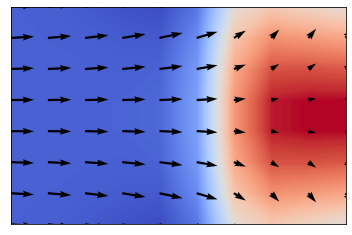

In [26]:
Nx=10
Ny=8
Lx=8.0
Ly=2.0
xp = np.linspace(0, Lx, Nx)
yp = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(xp, yp)

U=1.0-1.0/(1.0+np.exp(-3*(X-5.0)))+0.5
V=(Y-1.0)*(1.0/(1.0+np.exp(-0.5*(X-4.0))))
z = X**2+Y
fig, ax = plt.subplots()
ax.contourf(X,Y,np.sqrt(U**2+V**2),256,cmap="coolwarm_r")
ax.quiver(X,Y,U,V)
plt.xticks([]),plt.yticks([])
glue("reentry_fig", fig, display=False)

````{margin} Ejemplo de flujo compresible estacionario
Un ejemplo de flujo compresible **estacionario** es el flujo alrededor de un vehículo espacial a su entrada en la atmósfera. El gradiente de velocidad en la parte frontal de la cápsula es muy elevado y se produce una transición brusca en las variables fluidas (presión, densidad, velocidad) llamada onda de choque.

```{figure} images/Imagen10.png
---
width: 180px
name: cap1-fig6
---
Reentrada a la atmósfera de un vehículo espacial.
```

En la figura inferior se muestra el campo de velocidades en la zona frontal de la cápsula, marcada con un rectangulo verde en la figura superior. Se aprecia que la velocidad se reduce drásticamente, pasando de una zona de alta velocidad (azul) a una zona de baja velocidad (roja), separadas por la onda de choque. Esto implica una divergencia no nula de la velocidad, asociada a la compresibilidad del flujo.

```{glue:} reentry_fig
```

````


````{admonition} A recordar...
:class: note
Según el valor de la divergencia de la velocidad, podemos distinguir entre:

- Flujo compresible: $\nabla \cdot \vec{\bf{v}}\neq 0$

```{figure} images/Imagen8.png
---
width: 160px
name: cap1-fig8
---
Flujo compresible: hay acumulación/reducción de masa en el volumen de control. El volumen fluido se comprime/expande.
```

- Flujo incompresible: $\nabla \cdot \vec{\bf{v}} = 0$

```{figure} images/Imagen9.png
---
width: 250px
name: cap1-fig9
---
Flujo incompresible: no hay acumulación de masa en el volumen de control. El volumen fluido no se comprime/expande.
```
````

### Rotacional de la velocidad

Como en la sección previa, vamos a ilustrar este concepto con un ejemplo. Supongamos que tenemos un flujo viscoso en movimiento entre dos placas paralelas en reposo, separadas una distancia de 2 m. Como veremos en el tema 3, el perfil de velocidad entre las placas es parabólico. El campo de velocidades viene dado por la siguiente expresión:

$$ u=  1-(y-1)^2,\quad v=w=0  $$

existiendo un **gradiente transversal de velocidad** en dirección $y$.

En la siguiente figura se muestra el sistema y se representa este campo de velocidad.

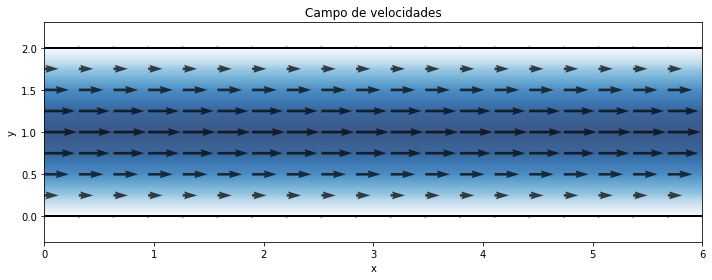

In [27]:
nq=1        #separacion entre vectores en quiver plot
Nx=20
Ny=9
Lx=6.0
Ly=2.0
xp = np.linspace(0, Lx, Nx)
yp = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(xp, yp)

def velU(y):
    return 1-(y-1)**2


t=0.0
U = velU(Y)
V = np.zeros(np.shape(X))

ypos=1.0
XP=[0,ypos]

fig, (ax) = plt.subplots(figsize=(10, 4))
ax.contourf(X,Y,velU(Y),256,cmap="Blues",alpha=0.8)
Q = ax.quiver(X, Y, U, V,alpha=0.7,scale=20,width=0.004)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_ylim([-0.15*Ly, 1.15*Ly])
ax.set_xlim([0, Lx])
ax.plot([0,Lx],[0, 0], 'k-',linewidth=2)
ax.plot([0,Lx],[Ly, Ly], 'k-',linewidth=2)

ax.set_title("Campo de velocidades")

plt.tight_layout()
glue("rot0_fig", fig, display=False)

```{glue:} rot0_fig
```

En la figura se observa que la velocidad es máxima en el centro del dominio ($y=1$ m) y es nula junto a las placas. El gradiente transversal de velocidad involucra la rotación del fluido. Para ello, vamos a soltar unos objetos en forma de *molinillo* en distintos puntos del dominio y vamos a ver cómo se mueven.

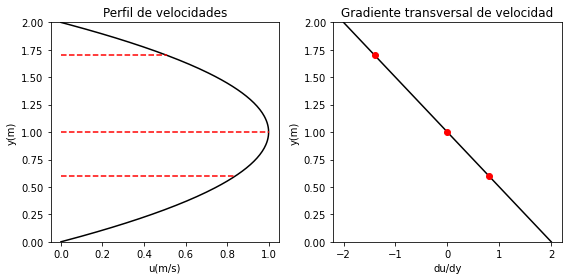

In [31]:
nq=1        #separacion entre vectores en quiver plot
Nx=20
Ny=9
Lx=6.0
Ly=2.0
xp = np.linspace(0, Lx, Nx)
yp = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(xp, yp)

def velU(y):
    return 1-(y-1)**2

def rotV(y):
    return 2*(y-1)

def giro(th):
    return np.array([[np.cos(th),np.sin(th)], [-np.sin(th),np.cos(th)]])

t=0.0
U = velU(Y)
V = np.zeros(np.shape(X))

ypos=1.0
XP=[0,ypos]

fig, (ax) = plt.subplots(figsize=(10, 4))
ax.contourf(X,Y,velU(Y),256,cmap="Blues",alpha=0.8)
Q = ax.quiver(X, Y, U, V,alpha=0.7,scale=20,width=0.004)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_ylim([-0.15*Ly, 1.15*Ly])
ax.set_xlim([0, Lx])
ax.plot([0,Lx],[0, 0], 'k-',linewidth=2)
ax.plot([0,Lx],[Ly, Ly], 'k-',linewidth=2)

ax.set_title("Campo de velocidades")

r=0.22
pts1 = np.array([[r,0], [-r,0], [0,r], [0,-r]])
#print(giro(np.pi))
#mt=giro(np.pi/2)
#print(pts1.dot(mt))



lin1, = ax.plot([], [], '.-',color="tab:orange",linewidth=5.0, markerfacecolor='white',ms=15)
lin2, = ax.plot([], [], '.-',color="tab:orange",linewidth=5.0, markerfacecolor='white',ms=15)
lin3, = ax.plot([], [], '.-',color="tab:orange",linewidth=5.0, markerfacecolor='white',ms=15)
lin4, = ax.plot([], [], '.-',color="tab:orange",linewidth=5.0, markerfacecolor='white',ms=15)
lin5, = ax.plot([], [], '.-',color="tab:orange",linewidth=5.0, markerfacecolor='white',ms=15)
lin6, = ax.plot([], [], '.-',color="tab:orange",linewidth=5.0, markerfacecolor='white',ms=15)

plt.close()

nframes=150    #frames de la animacion
tf=2.7*np.pi        #tiempo total
dt=tf/nframes #paso de tiempo

def update_plot(num):
    t = dt*num
    
    ypos=0.6
    xpos=velU(ypos)*t #3.0
    shift=np.zeros(np.shape(pts1))
    shift[:,0]=xpos
    shift[:,1]=ypos
    theta=2*rotV(ypos)*t
    mt=giro(theta)
    ptsg1=pts1.dot(mt)+shift
    lin1.set_data(ptsg1[0:2,0],ptsg1[0:2,1])
    lin2.set_data(ptsg1[2:4,0],ptsg1[2:4,1])
    
    #xpos=3.0
    ypos=1.7
    xpos=velU(ypos)*t #3.0
    shift=np.zeros(np.shape(pts1))
    shift[:,0]=xpos
    shift[:,1]=ypos
    theta=2*rotV(ypos)*t
    mt=giro(theta)
    ptsg1=pts1.dot(mt)+shift
    lin3.set_data(ptsg1[0:2,0],ptsg1[0:2,1])
    lin4.set_data(ptsg1[2:4,0],ptsg1[2:4,1])
    
    
    ypos=1.0
    xpos=velU(ypos)*t #3.0
    #xpos=xpos-.7
    shift=np.zeros(np.shape(pts1))
    shift[:,0]=xpos
    shift[:,1]=ypos
    theta=2*rotV(ypos)*t
    mt=giro(theta)
    ptsg1=pts1.dot(mt)+shift
    lin5.set_data(ptsg1[0:2,0],ptsg1[0:2,1])
    lin6.set_data(ptsg1[2:4,0],ptsg1[2:4,1])
    
    return

anim = animation.FuncAnimation(fig, update_plot, frames=nframes, interval=60, blit=False)  


fig, (ax2,ax3)= plt.subplots(1,2,figsize=(8, 4))

yp = np.linspace(0, Ly, 200)
Ux=velU(yp)
ax2.plot(Ux, yp, 'k')
ax2.set_xlabel("u(m/s)")
ax2.set_ylabel("y(m)")
ax2.set_ylim([0, Ly])
ax2.set_title("Perfil de velocidades")
Rx=-rotV(yp)
ax3.plot(Rx, yp, 'k')
ax3.set_xlabel("du/dy")
ax3.set_ylabel("y(m)")
ax3.set_ylim([0, Ly])
ax3.set_title("Gradiente transversal de velocidad")

ypos=0.6
ax2.plot([0,velU(ypos)],[ypos,ypos],'r--')
ax3.plot([-rotV(ypos)],[ypos],'ro')
ypos=1.7
ax2.plot([0,velU(ypos)],[ypos,ypos],'r--')
ax3.plot([-rotV(ypos)],[ypos],'ro')
ypos=1.0
ax2.plot([0,velU(ypos)],[ypos,ypos],'r--')
ax3.plot([-rotV(ypos)],[ypos],'ro')

plt.tight_layout()
glue("rot1_fig", fig, display=False)


In [32]:
HTML(anim.to_html5_video()) 

Se observa que estos molinillos no solo se desplazan sino que también **giran sobre si mismos**. Dicho giro se produce en sentido horario en el molinillo inferior y en sentido anti horario en el molinillo superior. El molinillo situado en el centro, no gira. Además, vemos que el molinillo superior, el que está más cerca de la pared, gira a mayor velocidad que el molinillo inferior.

A la vista de estos resultados, cabe preguntarse ¿a qué se debe este movimiento de rotación?. Basta con analizar el perfil de velocidades (figura siguiente) para darse cuenta de que el movimiento de rotación ocurre en aquellos puntos en los que hay un gradiente transversal de velocidad y que su magnitud parece ser propocional a éste.

```{glue:} rot1_fig
```

Este movimiento de rotación que hemos observado está asociado al **rotacional del campo de velocidades**.

```{admonition} Rotacional de la velocidad
:class: tip
El rotacional de la velocidad se define como la circulación de la velocidad a lo largo de una trayectoria cerrada $C$ cuando ésta tiende a cero:

$$
rot(\vec{\bf{v}}):= \nabla \times \vec{\bf{v}} = \lim_{l\rightarrow 0} \frac{1}{l} \int_{C}  \vec{\bf{v}} \cdot d\vec{\bf{l}} 
$$

y se calcula como

$$\nabla \times \vec{\bf{v}} =\left(\begin{array}{c}
\frac{\partial w}{\partial y} - \frac{\partial v}{\partial z}\\
\frac{\partial u}{\partial z} - \frac{\partial w}{\partial x}\\
\frac{\partial v}{\partial x} - \frac{\partial u}{\partial y}
\end{array}
\right)$$

Al rotacional de la velocidad también se le llama **vorticidad**, que es un vector definido como

$$
\vec{\bf{\omega}} =  \nabla \times \vec{\bf{v}}
$$

que representa una medida de la rotación local del flujo en un punto.

```


0.125

0.0

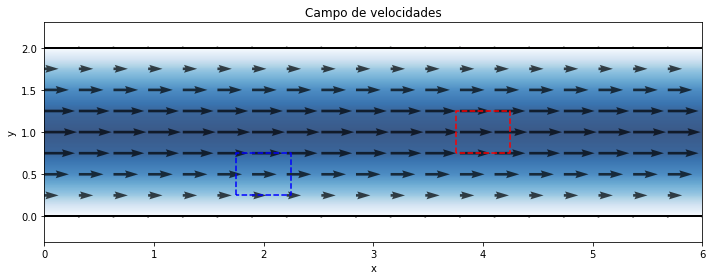

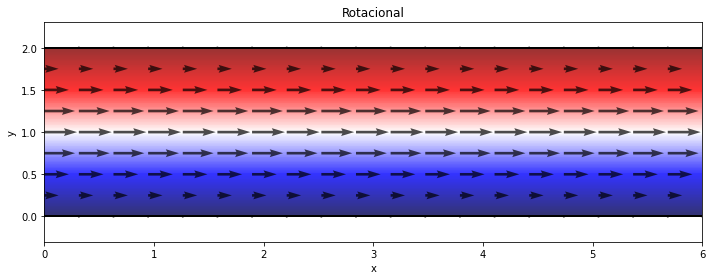

In [30]:
nq=1        #separacion entre vectores en quiver plot
Nx=20
Ny=9
Lx=6.0
Ly=2.0
xp = np.linspace(0, Lx, Nx)
yp = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(xp, yp)

def velU(y):
    return 1-(y-1)**2

def rotV(y):
    return 2*(y-1)

t=0.0
U = velU(Y)
V = np.zeros(np.shape(X))

ypos=1.0
XP=[0,ypos]

fig, (ax) = plt.subplots(figsize=(10, 4))
ax.contourf(X,Y,velU(Y),256,cmap="Blues",alpha=0.8)
Q = ax.quiver(X, Y, U, V,alpha=0.7,scale=20,width=0.004)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_ylim([-0.15*Ly, 1.15*Ly])
ax.set_xlim([0, Lx])
ax.plot([0,Lx],[0, 0], 'k-',linewidth=2)
ax.plot([0,Lx],[Ly, Ly], 'k-',linewidth=2)

ax.set_title("Campo de velocidades")

xc=2
yc=0.50
delta=0.25
ax.plot([xc-delta,xc-delta,xc+delta,xc+delta,xc-delta],[yc-delta,yc+delta,yc+delta,yc-delta,yc-delta], '--',linewidth=1.5, color="b")
vu=velU(yc+delta)
vd=velU(yc-delta)
rot=(vu*(2*delta)-vd*(2*delta))/(8*delta)
glue("var_rot1", np.round_(rot,4))

xc=4
yc=1.0
delta=0.25
ax.plot([xc-delta,xc-delta,xc+delta,xc+delta,xc-delta],[yc-delta,yc+delta,yc+delta,yc-delta,yc-delta], '--',linewidth=1.5, color="r")
vu=velU(yc+delta)
vd=velU(yc-delta)
rot=(vu*(2*delta)-vd*(2*delta))/(8*delta)
glue("var_rot2", np.round_(rot,4))

plt.tight_layout()
glue("rot2_fig", fig, display=False)



fig2, (ax) = plt.subplots(figsize=(10, 4))
ax.contourf(X,Y,rotV(Y),256,cmap="seismic",alpha=0.8)
Q = ax.quiver(X, Y, U, V,alpha=0.7,scale=20,width=0.004)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_ylim([-0.15*Ly, 1.15*Ly])
ax.set_xlim([0, Lx])
ax.plot([0,Lx],[0, 0], 'k-',linewidth=2)
ax.plot([0,Lx],[Ly, Ly], 'k-',linewidth=2)
ax.set_title("Rotacional")
plt.tight_layout()
glue("rot3_fig", fig2, display=False)


Para entender la definición de rotacional vamos a ver la siguiente figura.

```{glue:} rot2_fig
```

Consideremos dos trayectorias cerradas con forma cuadrada, una de ellas centrada respecto al eje del canal (en rojo) y otra descentrada (en azul). Si calculamos la circulación de la velocidad  en ellas obtenemos los siguientes valores:

- En la trayectoria azul, la circulación por unidad de longitud es {glue:text}`var_rot1`, puesto que en el segmento superior es mayor que en el segmento inferior. Esto estará relacionado con una vorticidad negativa (rotación en sentido horario).

- En la trayectoria roja, la circulación por unidad de longitud es {glue:text}`var_rot2`, puesto que en el segmento superior e inferior tiene la misma magnitud. Esto estará relacionado con una vorticidad nula.

A continuación se muestra con un mapa de colores el rotacional de la velocidad. La zona roja indica un rotacional positivo, la zona azul un rotacional negativo, y la zona blanca un rotacional nulo. 

```{glue:} rot3_fig
```



A continuación se muestra una manera sencilla de calcular la divergencia y rotacional de la velocidad mediante Python utilizando las funciones ```div()``` y ```rot()``` para el siguiente campo de velocidades

$$ \mathbf{v}=(x,zy,t). $$


In [ ]:
from sympy import*

x, y, z, t = symbols('x y z t')

def div(u,v,w):
    return u.diff(x)+v.diff(y)+w.diff(z)

def rot(u,v,w):
    dudy = u.diff(y)
    dudz = u.diff(z)
    dvdx = v.diff(x)
    dvdz = v.diff(z)
    dwdx = w.diff(x)
    dwdy = w.diff(y)
    rot_x = dwdy - dvdz
    rot_y = dudz - dwdx
    rot_z = dvdx - dudy

    return rot_x,rot_y,rot_z

u=x
v=z*y
w=2*t

T=x*y+z**2+6*t

print("La divergencia del flujo es:")
print(div(u,v,w))

print("El rotacional del flujo es:")
print(simplify(rot(u,v,w)))